In [56]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = sns . load_dataset ( 'titanic' )
print ( df . shape )
print ( df . head () )

(891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [57]:
#1.1
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
#1.2
missing_values = df.isna().sum()
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [59]:
#1.3 płeć
survivals = df.survived.mean()
print(f"Ocalali ogółem: {survivals.round(2)}")

#klasa
survivals_class = df.survived.groupby(df.pclass).mean()
print(f"Ocalali według klas: {survivals_class.round(2)}")

# klasa i płeć razem
survivals_sex_class = df.groupby(['sex', 'pclass'])['survived'].mean()
print(f" Ocalali wg płci i klasy:")
print(survivals_sex_class.round(2))

Ocalali ogółem: 0.38
Ocalali według klas: pclass
1    0.63
2    0.47
3    0.24
Name: survived, dtype: float64
 Ocalali wg płci i klasy:
sex     pclass
female  1         0.97
        2         0.92
        3         0.50
male    1         0.37
        2         0.16
        3         0.14
Name: survived, dtype: float64


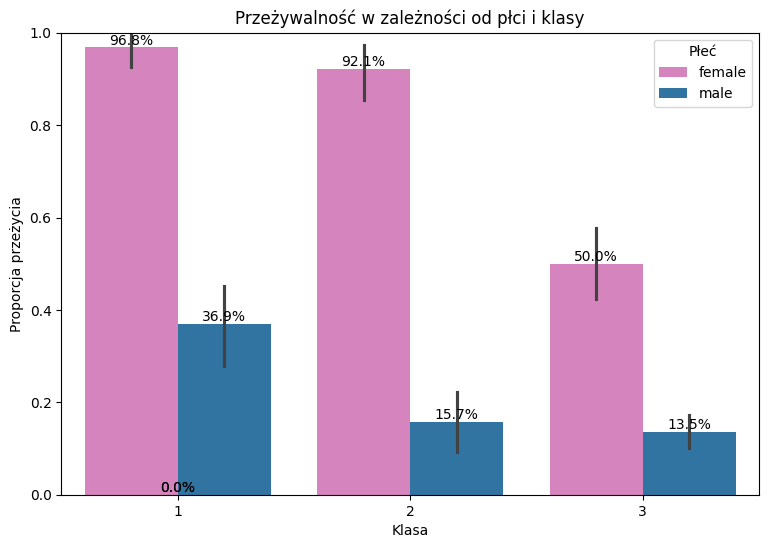

In [60]:
df = sns.load_dataset('titanic')

plt.figure(figsize=(9,6))
ax = sns.barplot(
    x='pclass',
    y='survived',
    hue='sex',
    data=df,
    palette={'male': '#1f77b4', 'female': '#e377c2'}
)


plt.title('Przeżywalność w zależności od płci i klasy')
plt.ylabel('Proporcja przeżycia')
plt.xlabel('Klasa')
plt.ylim(0, 1)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.1f}%',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10)

plt.legend(title='Płeć')
plt.show()



In [61]:
#2.1
df=df.drop(columns=['deck', 'cabin', 'ticket', 'Name'], errors= 'ignore')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [62]:
#2.2
df['age'] =(df['age'].fillna(df['age'].median()))
print(df['age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


In [63]:
df['age'].isna().sum()

np.int64(0)

In [64]:
#2.3
cat_cols = df.select_dtypes(include=['object', 'category']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [65]:
#2.4
from sklearn.model_selection import train_test_split

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Cały zbiór:")
print(y.value_counts(normalize=True))

print("\nZbiór treningowy:")
print(y_train.value_counts(normalize=True))

print("\nZbiór testowy:")
print(y_test.value_counts(normalize=True))

Cały zbiór:
survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Zbiór treningowy:
survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Zbiór testowy:
survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


In [66]:
#3.1
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
train_accuracy = model.score(X_train, y_train)
print(f"Dokładność na zbiorze treningowym: {train_accuracy:.3f}")
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

Dokładność na zbiorze treningowym: 1.000


1.0

In [67]:
# Sprawdzenie kolumn w poszukiwaniu wycieku informacji, gdyż wyżej wyszło 100% dokładności
X.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone',
       'sex_male', 'embarked_Q', 'embarked_S', 'class_Second', 'class_Third',
       'who_man', 'who_woman', 'embark_town_Queenstown',
       'embark_town_Southampton', 'alive_yes'],
      dtype='object')

In [68]:
leakage_cols = [
    'alive_yes',
    'who_man',
    'who_woman',
    'adult_male'
]

df = df.drop(columns=leakage_cols, errors='ignore')

In [69]:
# Ponowny podział na zbiory
X = df.drop('survived', axis=1)
y = df['survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [70]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [71]:
# Ponowne sprawdzenie, teraz wygląda realistycznie
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8100558659217877

In [72]:
#3.2
import pandas as pd

coefficients = pd.DataFrame({
    'zmienna': X_train.columns,
    'współczynnik': model.coef_[0]
}).sort_values(by='współczynnik', ascending=False)

coefficients
coefficients['abs'] = coefficients['współczynnik'].abs()
coefficients.sort_values(by='abs', ascending=False).head(3)


,zmienna,współczynnik,abs
6,sex_male,-2.485088,2.485088
0,pclass,-0.848864,0.848864
5,alone,-0.581862,0.581862


In [73]:
#3.3
import numpy as np
coefficients['odds_ratio'] = np.exp(coefficients['współczynnik'])
coefficients.sort_values(by='odds_ratio', ascending=False)

,zmienna,współczynnik,abs,odds_ratio
7,embarked_Q,0.184421,0.184421,1.202521
11,embark_town_Queenstown,0.184421,0.184421,1.202521
4,fare,0.002055,0.002055,1.002057
1,age,-0.037403,0.037403,0.963288
9,class_Second,-0.083447,0.083447,0.919940
8,embarked_S,-0.183011,0.183011,0.832759
12,embark_town_Southampton,-0.183011,0.183011,0.832759
3,parch,-0.191834,0.191834,0.825444
10,class_Third,-0.386407,0.386407,0.679494
2,sibsp,-0.391254,0.391254,0.676208


Dla zmiennej sex z odds_ratio możemy odczytać, że bycie mężczyzną obniża szansę przeżycia o 92%

In [74]:
#4.1
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
y_pred_proba_survived = y_pred_proba[:, 1]

pd.DataFrame({
    'Rzeczywiste': y_test.values,
    'Predykcja': y_pred,
    'P(przeżył)': y_pred_proba_survived
}).head(5)

,Rzeczywiste,Predykcja,P(przeżył)
0,0,0,0.084134
1,0,0,0.071666
2,1,0,0.144208
3,0,0,0.045480
4,1,1,0.741994


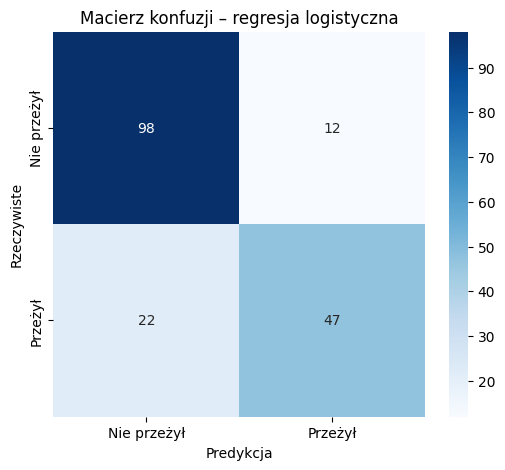

[[98 12]
 [22 47]]


In [75]:
#4.2
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Nie przeżył', 'Przeżył'],
    yticklabels=['Nie przeżył', 'Przeżył']
)

plt.xlabel('Predykcja')
plt.ylabel('Rzeczywiste')
plt.title('Macierz konfuzji – regresja logistyczna')
plt.show()
print(cm)



In [76]:
#4.3
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Specificity: {specificity:.3f}")


Accuracy: 0.810
Precision: 0.797
Recall: 0.681
F1-score: 0.734
Specificity: 0.891


AUC: 0.850


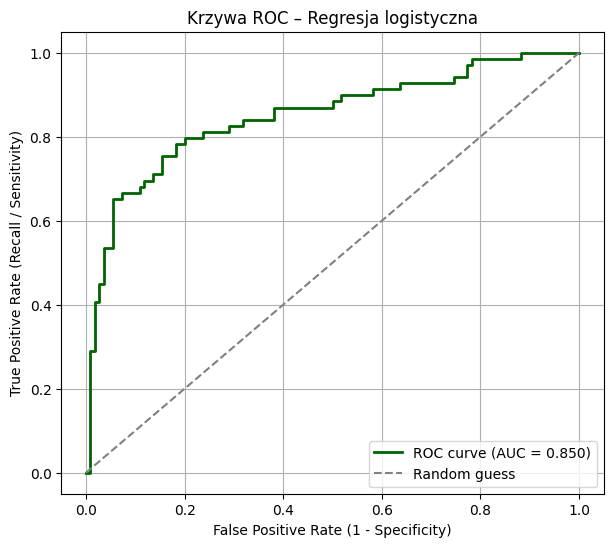

In [77]:
#4.4
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = model.predict_proba(X_test)[:, 1]

# Obliczenie ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Obliczenie AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

# Wykres ROC
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='darkgreen', linewidth=2,
         label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--',
         label='Random guess')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall / Sensitivity)')
plt.title('Krzywa ROC – Regresja logistyczna')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



#4.5 Najważniejszy jest Recall, gdyż chcemy minimalizować sytuację, gdzie predykcja mówi o śmierci, a ktoś ocalał.

In [78]:
#5.1
from sklearn.metrics import precision_score, recall_score

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

results = []

for t in thresholds:
    y_pred_threshold = (y_prob >= t).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    results.append({'Threshold': t, 'Precision': precision, 'Recall': recall})

df_results = pd.DataFrame(results)
print(df_results)


   Threshold  Precision    Recall
0        0.3   0.674699  0.811594
1        0.4   0.722222  0.753623
2        0.5   0.796610  0.681159
3        0.6   0.875000  0.608696
4        0.7   0.880952  0.536232


In [79]:
#5.2
model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)
y_prob_balanced = model_balanced.predict_proba(X_test)[:, 1]

def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred)
    }

# Bazowy model
metrics_base = evaluate_model(y_test, y_pred)

# Model balanced
metrics_balanced = evaluate_model(y_test, y_pred_balanced)

pd.DataFrame([metrics_base, metrics_balanced], index=['Base', 'Balanced']).round(3)



,Accuracy,Precision,Recall,F1-score
Base,0.810,0.797,0.681,0.734
Balanced,0.799,0.726,0.768,0.746


In [80]:
#6.1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


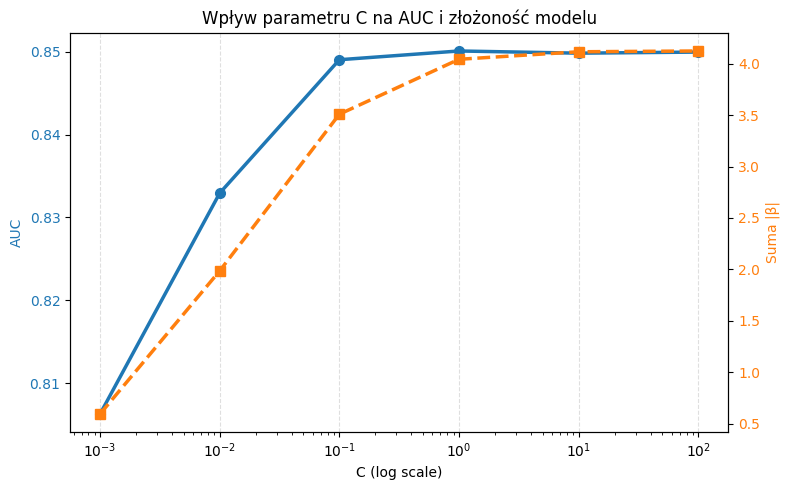

In [81]:
#6.2
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
auc_scores = []
coef_sums = []
for C in C_values:
    model = LogisticRegression(C=C, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)

    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    auc_scores.append(auc)

    coef_sums.append(np.sum(np.abs(model.coef_[0])))

fig, ax1 = plt.subplots(figsize=(8,5))

# Oś X
ax1.set_xlabel('C (log scale)')
ax1.set_xscale('log')

# AUC – granat
ax1.set_ylabel('AUC', color='#1f77b4')
ax1.plot(
    C_values, auc_scores,
    color='#1f77b4',
    marker='o',
    markersize=7,
    linewidth=2.5,
    label='AUC'
)
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.grid(axis='x', linestyle='--', alpha=0.4)

# Druga oś – suma współczynników (pomarańcz)
ax2 = ax1.twinx()
ax2.set_ylabel('Suma |β|', color='#ff7f0e')
ax2.plot(
    C_values, coef_sums,
    color='#ff7f0e',
    marker='s',
    markersize=7,
    linewidth=2.5,
    linestyle='--',
    label='Suma |β|'
)
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Tytuł
plt.title('Wpływ parametru C na AUC i złożoność modelu')

fig.tight_layout()
plt.show()




In [82]:
#6.3
C = 0.1

model_l2 = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000, random_state=42)
model_l2.fit(X_train_scaled, y_train)

model_l1 = LogisticRegression(penalty='l1', C=C, solver='liblinear', max_iter=1000, random_state=42)
model_l1.fit(X_train_scaled, y_train)

coef_comparison = pd.DataFrame({
    'feature': X_train.columns,
    'L2_coef': model_l2.coef_[0],
    'L1_coef': model_l1.coef_[0]
})
coef_comparison.round(3)




,feature,L2_coef,L1_coef
0,pclass,-0.474,-0.746
1,age,-0.406,-0.314
2,sibsp,-0.323,-0.117
3,parch,-0.129,0.000
4,fare,0.117,0.013
5,alone,-0.236,-0.003
6,sex_male,-1.113,-1.126
7,embarked_Q,0.043,0.000
8,embarked_S,-0.089,-0.110
9,class_Second,-0.081,0.000
